# Classification Schoolwork
### milestone2
#### author：Hsu An      2016011434
#### last update: 3 Dec 2018

update:
1. 使用LightGBM在未进行调参的情况下进行测试，acc为0.9270758122743682

In [39]:
import scipy.io as scio
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb   

from sklearn.metrics import accuracy_score

import seaborn as sns

## 1.数据预处理

In [29]:
# 读入数据
dataset = np.array([])
file_num = [2,3,5,6,8,10,11,12,14]
file_len = np.array([])
for i in file_num:
    dataFile = 'dataset/data'+str(i)+'_train.mat'
    data = scio.loadmat(dataFile)
    data = np.array(data['data'+str(i)+'_train'])
    file_len = np.append(file_len,data.shape[0])
    label = np.full((len(data)),i)
    data = np.c_[data,label]
    dataset = np.append(dataset,data)

# 将一维数据转化为行列形式
dataset = dataset.reshape(-1,201)
dataset
file_len = file_len.astype(int)

In [3]:
dataset = pd.DataFrame(dataset)
dataset.rename(columns={ dataset.columns[200]: "y" }, inplace=True) # rename不是传递对象

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,y
0,3688.0,4381.0,4594.0,4415.0,4944.0,5287.0,5470.0,5363.0,5364.0,5123.0,...,1114.0,1123.0,1123.0,1103.0,1071.0,1078.0,1064.0,1034.0,1010.0,2.0
1,2579.0,4137.0,4412.0,4343.0,4825.0,5228.0,5359.0,5184.0,5185.0,5020.0,...,1111.0,1113.0,1119.0,1089.0,1075.0,1081.0,1051.0,1043.0,1005.0,2.0
2,2581.0,4264.0,4328.0,4334.0,4758.0,5116.0,5129.0,5015.0,4958.0,4788.0,...,1110.0,1095.0,1103.0,1086.0,1067.0,1073.0,1054.0,1022.0,1009.0,2.0
3,2747.0,4377.0,4412.0,4196.0,4635.0,4969.0,4990.0,4920.0,4863.0,4620.0,...,1099.0,1096.0,1100.0,1078.0,1066.0,1085.0,1042.0,1029.0,1023.0,2.0
4,3178.0,4013.0,4324.0,4258.0,4530.0,4959.0,4909.0,4801.0,4725.0,4614.0,...,1089.0,1086.0,1092.0,1073.0,1066.0,1065.0,1040.0,1034.0,1015.0,2.0
5,2749.0,4257.0,4324.0,4129.0,4635.0,4866.0,4962.0,4807.0,4767.0,4568.0,...,1084.0,1087.0,1098.0,1080.0,1058.0,1067.0,1045.0,1021.0,1014.0,2.0
6,2579.0,4137.0,4328.0,4343.0,4535.0,4915.0,5043.0,4846.0,4791.0,4507.0,...,1101.0,1095.0,1100.0,1078.0,1065.0,1063.0,1041.0,1024.0,1019.0,2.0
7,2584.0,4253.0,4421.0,4334.0,4697.0,4915.0,4985.0,4841.0,4719.0,4540.0,...,1091.0,1089.0,1100.0,1081.0,1066.0,1054.0,1053.0,1029.0,1014.0,2.0
8,3693.0,4005.0,4510.0,4201.0,4582.0,4920.0,4866.0,4791.0,4719.0,4540.0,...,1088.0,1092.0,1096.0,1082.0,1053.0,1053.0,1033.0,1025.0,1019.0,2.0
9,3688.0,4009.0,4501.0,4343.0,4578.0,4969.0,4942.0,4712.0,4725.0,4528.0,...,1088.0,1092.0,1095.0,1078.0,1056.0,1061.0,1039.0,1020.0,1014.0,2.0


In [51]:
# 按照类别拆分成多个单元
file_num = [2,3,5,6,8,10,11,12,14]
class_2 = dataset[:file_len[0]]
class_2 = pd.DataFrame(class_2)
class_3 = dataset[file_len[0]:file_len[0]+file_len[1]]
class_3 = pd.DataFrame(class_3)
class_5 = dataset[file_len[0]+file_len[1]:file_len[0]+file_len[1]+file_len[2]]
class_5 = pd.DataFrame(class_5)
class_6 = dataset[file_len[0]+file_len[1]+file_len[2]:file_len[0]+file_len[1]+file_len[2]+file_len[3]]
class_6 = pd.DataFrame(class_6)
class_8 = dataset[file_len[0]+file_len[1]+file_len[2]+file_len[3]:file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]]
class_8 = pd.DataFrame(class_8)
class_10 = dataset[file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]:file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]]
class_10 = pd.DataFrame(class_10)
class_11 = dataset[file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]:file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]+file_len[6]]
class_11 = pd.DataFrame(class_11)
class_12 = dataset[file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]+file_len[6]:file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]+file_len[6]+file_len[7]]
class_12 = pd.DataFrame(class_12)
class_14 = dataset[file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]+file_len[6]+file_len[7]:file_len[0]+file_len[1]+file_len[2]+file_len[3]+file_len[4]+file_len[5]+file_len[6]+file_len[7]+file_len[8]]
class_14 = pd.DataFrame(class_14)


file_len

array([1071,  622,  362,  547,  358,  729, 1841,  445,  949])

## 各个类别的相关度矩阵

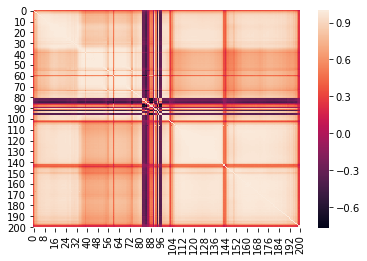

In [48]:
corr_matrix2 = class_2.corr()
sns.heatmap(corr_matrix2)

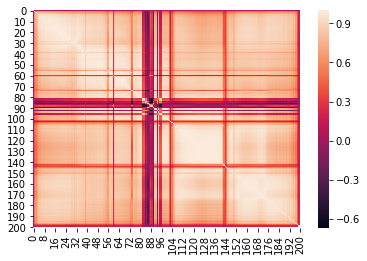

In [49]:
corr_matrix3 = class_3.corr()
sns.heatmap(corr_matrix3)

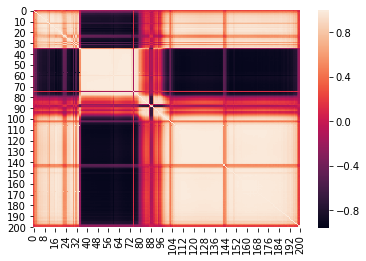

In [52]:
corr_matrix5 = class_5.corr()
sns.heatmap(corr_matrix5)

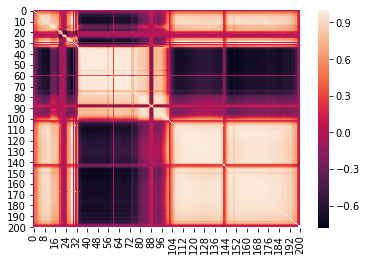

In [53]:
corr_matrix6 = class_6.corr()
sns.heatmap(corr_matrix6)

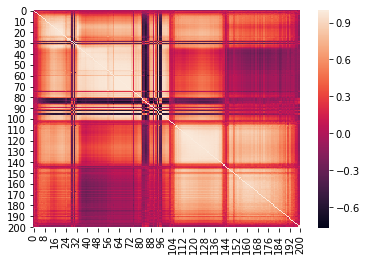

In [54]:
corr_matrix8 = class_8.corr()
sns.heatmap(corr_matrix8)

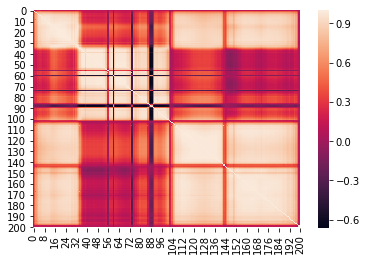

In [55]:
corr_matrix10 = class_10.corr()
sns.heatmap(corr_matrix10)

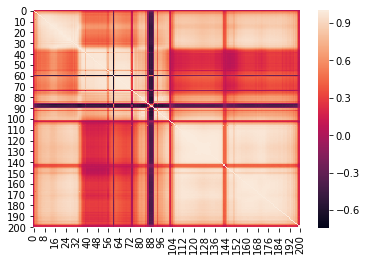

In [57]:
corr_matrix11 = class_11.corr()
sns.heatmap(corr_matrix11)

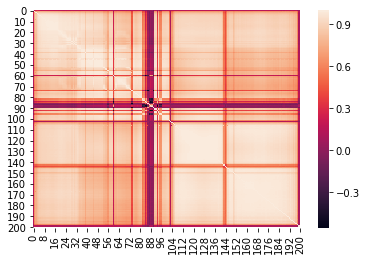

In [58]:
corr_matrix12 = class_12.corr()
sns.heatmap(corr_matrix12)

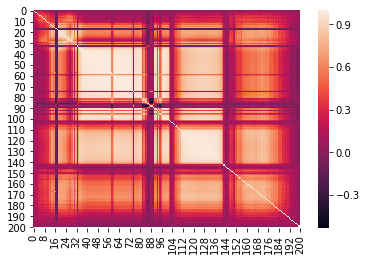

In [59]:
corr_matrix14 = class_14.corr()
sns.heatmap(corr_matrix14)

In [ ]:
ground_truth = spectral.imshow(classes = output_image.astype(int),figsize =(9,9))